# Project 09 -- Emilio Pozas

## Question 1

In [1]:
benfords_law <- function(d) log10(1+1/d)

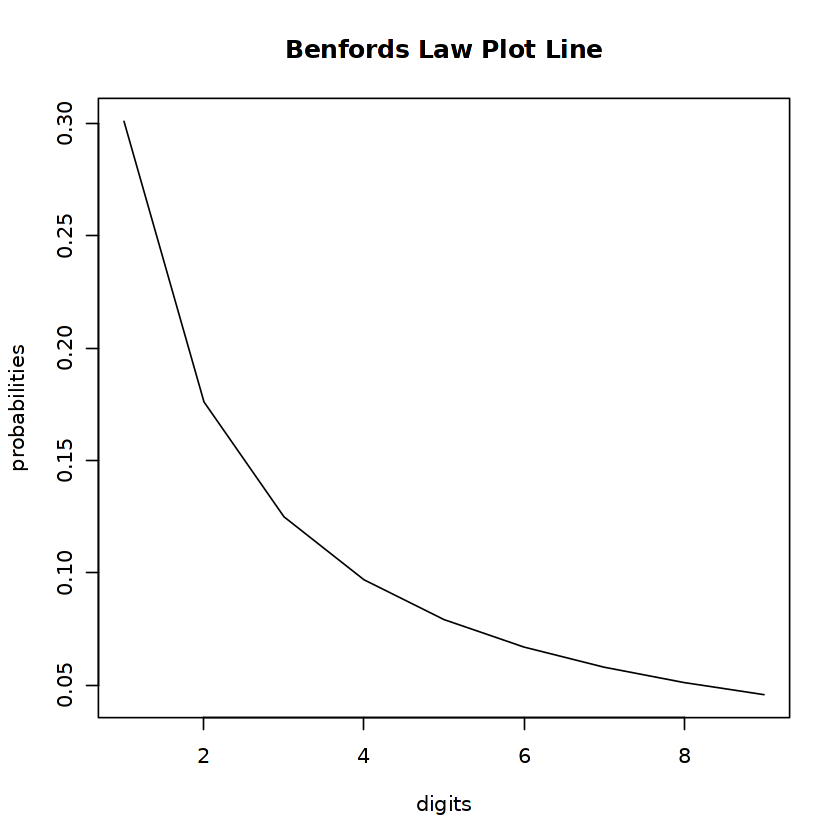

In [2]:
digits <-1:9
bf_val<-benfords_law(digits)
plot(type="l",digits, bf_val, xlab = "digits", ylab="probabilities", main="Benfords Law Plot Line")

## Question 2

In [3]:
first_digit <- function (n) {
    n <- abs(n)
    if(n != 0) {
        while(n >= 10) {
            n <- n/10
        }
        while(n <1) {
            n <- n*10
         }
        n <- floor(n)
    }
    
    return(n)
}

In [4]:
first_digit(403434)

[1] 4

In [5]:
first_digit(000.000303434)

[1] 3

## Question 3

In [6]:
library(data.table)

In [7]:
myDF <- fread("/anvil/projects/tdm/data/restaurant/orders.csv")

In [10]:
head(myDF)

akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR,fd_grand_total
<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<dttm>,<dttm>,<dttm>,<dttm>,<int>,<dttm>,<int>,<chr>,<chr>,<dbl>
163238,92PEE24,1,7.6,2,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,,92PEE24 X 0 X 105,7
163240,QS68UD8,1,8.7,1,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294,8
163241,MB7VY5F,2,14.4,1,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,,MB7VY5F X 0 X 83,1
163244,KDJ951Y,1,7.1,1,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90,7
163245,BAL0RVT,4,27.2,1,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83,2
163246,U263OCD,3,18.2,2,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,83,2019-08-01 05:37:05,0,Work,U263OCD X 0 X 83,1


In [9]:
myDF$fd_grand_total <- sapply(myDF$grand_total, first_digit)

## Question 4

In [11]:
table(myDF$fd_grand_total)


    0     1     2     3     4     5     6     7     8     9 
  683 53892 17230  8246  7173  7915  9509 10314  9503 10838 

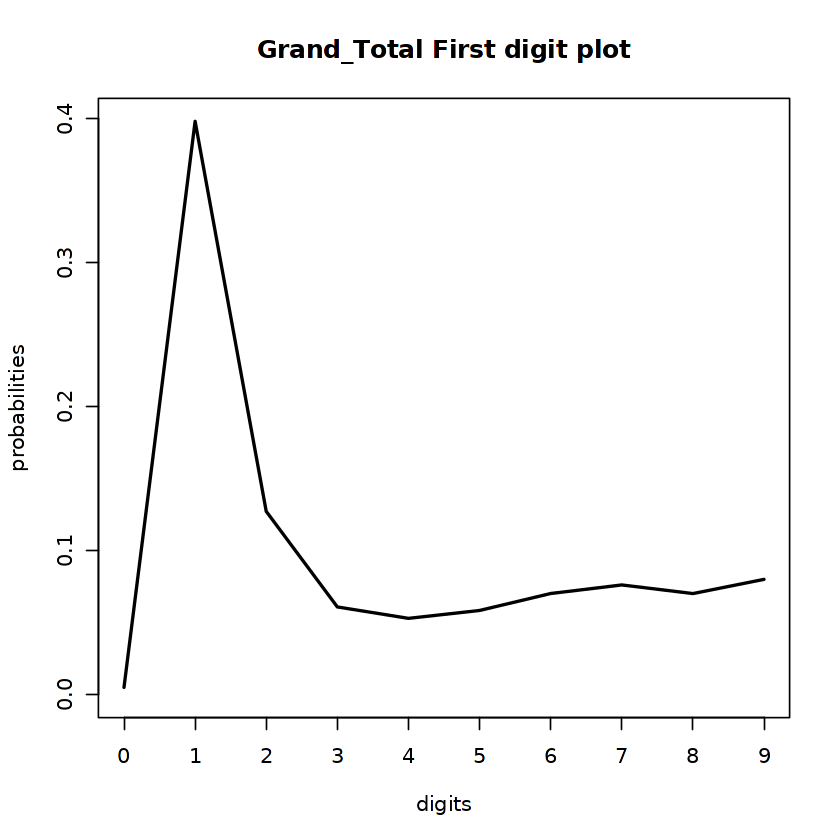

In [14]:
plot(type="l",table(myDF$fd_grand_total)/ length(myDF$fd_grand_total), xlab = "digits", ylab="probabilities", main="Grand_Total First digit plot")

If we ignore the 0. We still see more variation at the tail end of the graph than what we would see in Benford's law. As well as some small differences in the at the number 1 and 2. 

## Question 5

In [18]:
as.Date(head(myDF$delivery_date))

[1] "2019-07-31" "2019-07-31" "2019-07-31" "2019-07-31" "2019-07-31"
[6] "2019-07-31"

In [24]:
find_orders <- function(start_date, end_date) {
    orders_by_dates <- subset (myDF,(( myDF$delivery_date >= start_date) & (myDF$delivery_date <= end_date)))
    return(orders_by_dates)
    }


In [29]:
myresulstDF<-find_orders("2019-05-21","2020-11-21")

In [30]:
dim(myresulstDF)

[1] 35544    27

In [31]:
head(myresulstDF)

akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR,fd_grand_total
<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<dttm>,<dttm>,<dttm>,<dttm>,<int>,<dttm>,<int>,<chr>,<chr>,<dbl>
163238,92PEE24,1,7.6,2,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,,92PEE24 X 0 X 105,7
163240,QS68UD8,1,8.7,1,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294,8
163241,MB7VY5F,2,14.4,1,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,,MB7VY5F X 0 X 83,1
163244,KDJ951Y,1,7.1,1,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90,7
163245,BAL0RVT,4,27.2,1,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83,2
163246,U263OCD,3,18.2,2,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,83,2019-08-01 05:37:05,0,Work,U263OCD X 0 X 83,1


## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.